In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist



In [2]:
# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:

# Checking the shape 
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
num_pixels = X_train.shape[1] * X_train.shape[2]

# Converting from intergers to float and reshaping the pixels
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Normalize the pixel values in the range [0,1]
X_train = X_train / 255
X_test = X_test / 255

# Checking the shape again after reshaping 
X_train.shape, X_test.shape, num_pixels

((60000, 784), (10000, 784), 784)

In [7]:
# Adding noise to the images
noise_factor = 0.4
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Clip pixel values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

x_test_noisy.shape, x_train_noisy.shape

((10000, 784), (60000, 784))

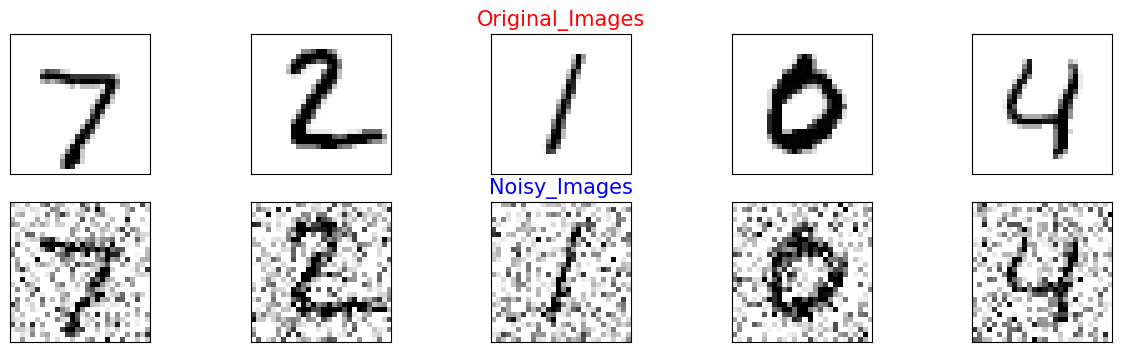

In [8]:
# display original and noisy images side by side
n = 5  # number of images to display
plt.figure(figsize=(15, 4))
for i in range(n):
    # display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28,28), cmap= plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 2:
        plt.title('Original_Images', color = 'Red', fontsize = 15)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28,28), cmap=plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 2:
        plt.title('Noisy_Images', color = 'Blue', fontsize = 15)

plt.show()

In [9]:
# Create model
model = Sequential()
# Encoding network
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
# Latent space (code)
model.add(Dense(100, activation='relu'))
# Decoding network
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
# Output image
model.add(Dense(784, activation='sigmoid'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 300)               30300     
                                                                 
 dense_4 (Dense)             (None, 500)               150500    
                                                                 
 dense_5 (Dense)             (None, 784)               392784    
                                                                 
Total params: 1,146,484
Trainable params: 1,146,484
Non-

In [10]:
# Training model
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=5, batch_size=200)

Epoch 1/5
300/300 [==============================] - 5s 5ms/step - loss: 0.0454 - accuracy: 0.0104 - val_loss: 0.0258 - val_accuracy: 0.0130
Epoch 2/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0220 - accuracy: 0.0111 - val_loss: 0.0190 - val_accuracy: 0.0103
Epoch 3/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0177 - accuracy: 0.0115 - val_loss: 0.0172 - val_accuracy: 0.0133
Epoch 4/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0158 - accuracy: 0.0125 - val_loss: 0.0150 - val_accuracy: 0.0134
Epoch 5/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0146 - accuracy: 0.0142 - val_loss: 0.0142 - val_accuracy: 0.0144


In [11]:
# Final evaluation of the model
pred = model.predict(x_test_noisy, verbose = 0)
pred.shape

(10000, 784)

Test Images


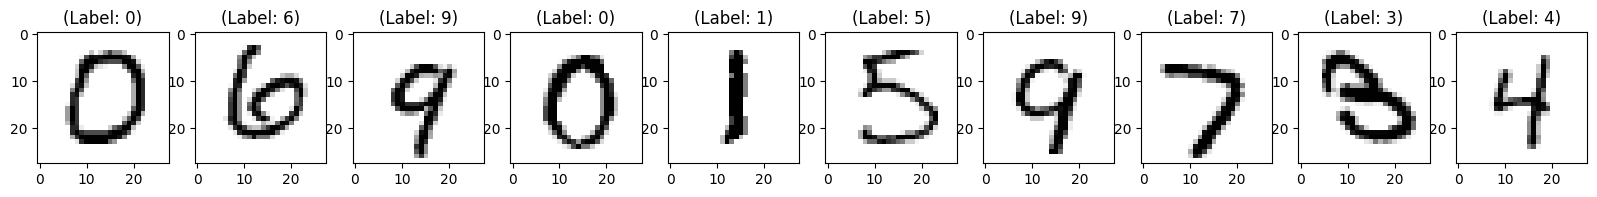

Test Images with Noise


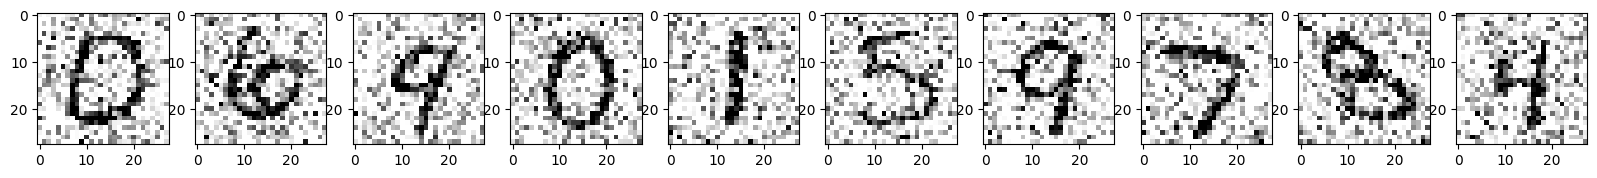

Reconstruction of Noisy Test Images


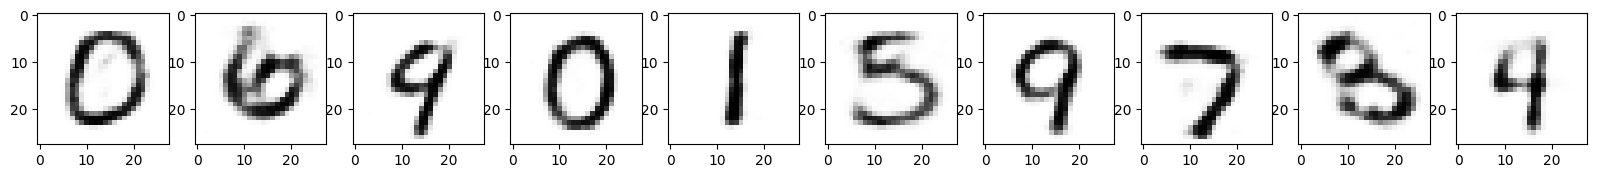

In [14]:
X_test = np.reshape(X_test, (10000,28,28)) 
pred = np.reshape(pred, (10000,28,28)) 
x_test_noisy = np.reshape(x_test_noisy, (-1,28,28)) 
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i], cmap=plt.cm.binary)
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i], cmap=plt.cm.binary)  
plt.show()